In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [3]:
with open ('candidate_eval.pickle', 'rb') as char:
    candidates, model = pickle.load(char)

In [18]:
visible_area = []
vis_hits_all_ids = []
for i, candidate in enumerate(candidates):
    hits_vis = list(candidates[i]['hit ids'][0])
    vis_hits_all_ids.extend(hits_vis)
    area_visible = 0
    for id in hits_vis:
        area_visible += model['area'][id]
    visible_area.append(area_visible)
len(visible_area)

1513

In [23]:
model.keys()

dict_keys(['size', 'ids', 'area totalvertices', 'triangles', 'midpoint', 'normal', 'area', 'hit by', 'vertices', 'normals', 'area total'])

In [9]:
covered_area = []
cov_hits_all_ids = []
for i, candidate in enumerate(candidates):
    hits_cov = list(candidates[i]['qualified hits'])
    cov_hits_all_ids.extend(hits_cov)
    area_cov = 0
    for id in hits_cov:
        area_cov += model['area'][id]
    covered_area.append(area_cov)
len(covered_area)

1513

In [15]:
cov_ids = np.unique(np.asarray(cov_hits_all_ids))
area_cov = 0
for id in cov_ids:
    area_cov += model['area'][id]
print(area_cov, area_cov/model['area total'])

242.8032080542698 0.5266371963076925


In [19]:
vis_ids = np.unique(np.asarray(vis_hits_all_ids))
area_vis = 0
for id in vis_ids:
    area_vis += model['area'][id]
print(area_vis, area_vis/model['area total'])

246.21210903260462 0.5340310609444379


In [20]:
area_cov / area_vis

0.9861546168800195

In [1]:
model['area total']

NameError: name 'model' is not defined

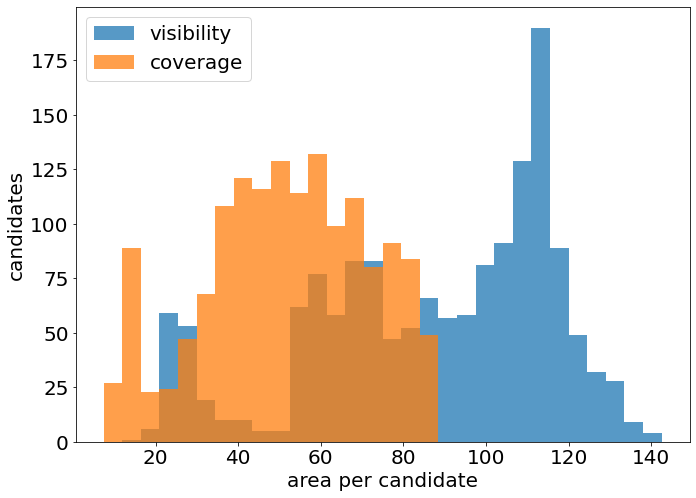

In [22]:
plt.figure(figsize=(11,8))
plt.rcParams.update({'font.size': 20})
bins = np.histogram(np.hstack((visible_area, covered_area)), bins=30)[1]
plt.hist(visible_area, bins, alpha=0.75, label='visibility')#, color='b')
plt.hist(covered_area, bins, alpha=0.75, label='coverage')#, color='g')
# plt.grid(axis = 'x')
plt.xlabel("area per candidate")
plt.ylabel("candidates")
plt.legend(loc="upper left")
plt.show()